In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

读取MNIST数据

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [33]:
train_data = mnist.train.images[np.logical_or(mnist.train.labels==6,mnist.train.labels==9)]   
val_data = mnist.validation.images[np.logical_or(mnist.validation.labels==6,mnist.validation.labels==9)]  
test_data = mnist.test.images[np.logical_or(mnist.test.labels==6,mnist.test.labels==9)]      

In [34]:
print(train_data.shape,val_data.shape,test_data.shape)

(10871, 784) (996, 784) (1967, 784)


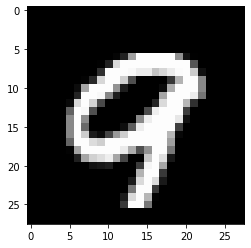

In [35]:
im = train_data[2].reshape(28,28)
plt.imshow(im,'gray')

In [36]:
train_labels = mnist.train.labels[np.logical_or(mnist.train.labels==6,mnist.train.labels==9)]        
val_labels = mnist.validation.labels[np.logical_or(mnist.validation.labels==6,mnist.validation.labels==9)]  
test_labels = mnist.test.labels[np.logical_or(mnist.test.labels==6,mnist.test.labels==9)]

In [37]:
train_labels

array([6, 9, 9, ..., 9, 9, 6], dtype=uint8)

In [38]:
from keras.models import Sequential

In [39]:
from keras.layers.core import Dense,Activation

In [40]:
model=Sequential()

In [41]:
model.add(Dense(10,input_dim=len(train_data[0])))
model.add(Activation("relu"))

In [42]:
model.add(Dense(1))

In [43]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [44]:
model.fit(train_data,train_labels,epochs=100,batch_size=100)

Epoch 1/100
109/109 [==============================] - 0s 3ms/step - loss: 18.6755
Epoch 2/100
109/109 [==============================] - 1s 5ms/step - loss: 3.4021
Epoch 3/100
109/109 [==============================] - 1s 5ms/step - loss: 2.8732
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 2.6684
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 2.5039
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 2.3683
Epoch 7/100
109/109 [==============================] - 1s 5ms/step - loss: 2.2479
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 2.1409
Epoch 9/100
109/109 [==============================] - 1s 5ms/step - loss: 2.0392
Epoch 10/100
109/109 [==============================] - 0s 4ms/step - loss: 1.9398
Epoch 11/100
109/109 [==============================] - 0s 4ms/step - loss: 1.8473
Epoch 12/100
109/109 [==============================] - 1s 5ms/step - loss: 1.7558
Epoch 13/100

In [45]:
test_result = np.rint(model.predict(test_data)).astype(np.uint8).flatten()

print("accuracy score is ", accuracy_score(test_labels, test_result))

accuracy score is  0.9816980172852059
